# Online Store of Video Games Analysis

The online store sells video games worldwide. Historical data from open sources is available on game sales, user and expert ratings, genres, and platforms (e.g., Xbox or PlayStation).  is essential to identify the presence or absence of regional differences in game consumer preferences.

**Research Objective:** identify patterns that determine the success of games, which will allow for betting on potentially popular products and planning advertising campaigns for the next year.

**Research Tasks:**

- Assess the suitability of the initial data for further analysis and conduct data preprocessing.
- Identify the relevant period for which the data will be analyzed.
- Assess the popularity of platforms.
- Analyze the impact of game characteristics such as platforms, genre, critic and user ratings on game sales volume.
- Identify the presence or absence of regional differences in game consuming.
- Test hypotheses about the existence of a statistically significant difference in the popularity of games across various platforms and genres.

## Summary of the Analysis Results

Based on the exploratory data analysis:

- The graph of game releases by year shows a sharp increase in game production in 1995 and 2002, peaking in 2008-2009, and declining to a plateau in 2012-2016. From this, we can forecast stable development of the gaming industry for 2017.
- In the last decade, new generations of platforms have entered the market every 5-6 years. The only platform that has shown stable average results over the years is the personal computer (PC).
- The most popular and promising platforms are PS (PS3, PS4), Xbox (X360, XOne), DS (3DS), and Wii (WiiU).
- For detailed analysis, the period from 2012 to 2016 was selected.
- Critics' and users' ratings have little effect on sales.
- The genre of games significantly affects sales. The most popular genres by average sales per game are Shooter, Platform, and Sports. Based on aggregated data considering the total number of games released, the most popular genres are Action, Shooter, and Role-Playing. The least popular genres by any calculation method are Strategy, Puzzle, and Adventure.
- Genre popularity trends are similar in North America and Europe, while in Japan Role-Playing takes the top spot, and Platform makes it into the top 5.
- The North American region leads in sales volume, surpassing other regions combined. In North America and Europe, the most popular platforms are Xbox (X360) and PlayStation (PS3, PS4), while in Japan, the locally produced Nintendo (3DS) platform is most popular.
- In North America, games with an M rating are the most popular, while those with a T rating are the least popular. Games produced in Japan and Europe have significantly lower sales volumes.

When planning campaigns for the following years, it is necessary to focus on the latest models of the most popular platforms - Xbox One, PS4, 3DS, WiiU. In planning marketing campaigns, it is not necessary to emphasize improving critics' and users' ratings, but regional market peculiarities should definitely be considered: different genres and platforms are popular in different markets.

## Data Overview

Importing the necessary libraries for data analysis:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import pylab as pl
import re
from scipy import stats as st
import json

Reading the file `games.csv` with the data (the path to the data is stored in a JSON file) and saving it in the variable `data`:

In [2]:
# Reading of JSON file
with open('config.json', 'r', encoding='utf-8') as f:
    config = json.load(f)
 
# Reading the CSV file using the path from the JSON file
dataset_path = config['dataset_path_games']
data = pd.read_csv(dataset_path)

Removing the restrictions on displaying the number of columns, rows, and column width.

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Displaying the first 10 rows of the dataframe `data` on the screen.

In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Displaying the main information about the data frame using the `info()` method.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In all columns, except those containing information on sales volumes and the platform on which the games were released, there are missing values that need to be either restored or assessed for the possibility of retaining the missing values. In some columns, the data type does not correspond to the values stored in them. All these shortcomings of the initial dataframe will be addressed during the data preprocessing stage.

## Data Preprocessing

### Column Names

In [6]:
# Replacing column names (converting to lowercase)
data.columns = data.columns.str.lower()

### Duplicates Removal

Checking for explicit duplicates in the dataframe

In [7]:
data.duplicated().sum()

0

No explicit duplicates found.

Let's also check if there are rows that are identical except for sales values:

In [8]:
# Creating an intermediate dataframe with all columns except sales:
df1 = data.loc[:, ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']]
# Counting the number of duplicates in this dataframe:
df1.duplicated().sum()

2

In [9]:
# Displaying duplicate rows from the intermediate dataframe
df1.loc[df1.duplicated(keep=False)]

,name,platform,year_of_release,genre,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,83.0,5.5,E


In [10]:
# Dislaying the same rows from the main dataframe
data.loc[[604, 659, 14244, 16230]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


For rows 659 and 14244, there is no information about the game's name or genre, nor about ratings and scores. The data relates to the year 1993, with relatively low information on the number of copies sold, and it's not possible to reconstruct the game names based on other data. These are the only two rows where values for the `name` and `genre` columns are missing. Therefore, these two rows will be deleted from the dataframe for further analysis.

In [11]:
data = data.loc[~data['name'].isna()]

For further data processing, we will combine rows that differ only in sales data (604, 16230) into a separate dataframe:

In [12]:
# Combining the two desired rows into an intermediate dataframe df2
df2 = data.loc[[604, 16230]]
df2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [13]:
# Selecting the indices of the desired rows
index_1 = 604
index_2 = 16230

# Summing values for the selected rows
sum_row = df2.loc[index_1, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] + \
          df2.loc[index_2, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]

# Updating values in the original row
df2.loc[index_1, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']] = sum_row

# Displaying the result
df2.loc[index_1]

name               Madden NFL 13
platform                     PS3
year_of_release           2012.0
genre                     Sports
na_sales                    2.11
eu_sales                    0.23
jp_sales                     0.0
other_sales                 0.23
critic_score                83.0
user_score                   5.5
rating                         E
Name: 604, dtype: object

In [14]:
# Replacing the row in the main dataframe with the combined data
data.loc[604] = df2.loc[index_1]

# Removing the duplicate row from which we took the values for the sum
data = data.drop(16230)

# Resetting the dataframe's indices
data = data.reset_index(drop=True)

# Displaying the updated rows for verification
data.loc[[604, 16230]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.00,0.23,83.0,5.5,E
16230,Geten no Hana: Yume Akari,PSP,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN


The dataframe has been cleaned by removing rows that either do not contain the relevant information or represent duplicated information about the same game.

### Handling Missing Values and Data Type Conversion

At this stage of the analysis, there are no missing values in the `name`, `platform`, and `genre` columns. For further convenience in data processing, let's change the data type of these columns from `object` to `str`:

In [15]:
data['name'] = data['name'].astype(str)

In [16]:
data['platform'] = data['platform'].astype(str)

In [17]:
data['genre'] = data['genre'].astype(str)

**Year_of_release column**

In [18]:
# Displaying the first few rows where values are missing in the 'year_of_release' column
data.loc[data['year_of_release'].isna()].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


As seen from the displayed rows, the game titles often include mentions of the year.

In [19]:
# Displaying the first 5 rows where the game title mentions a year starting from 2000,
# and the year of release is not specified
data.loc[(data['year_of_release'].isna()) &( data['name'].str.contains(' 20'))].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1649,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2491,MLB SlugFest 20-03,PS2,NaN,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E


If we analyze the displayed games, we can determine that their release year precedes the year mentioned in the title. For example, 'Madden NFL 2004' was released in 2003, 'WWE Smackdown vs. Raw 2006' in 2005, and so on. Additionally, errors were found in game titles where the year is written with a hyphen, such as '20-03'.

In [20]:
# Correcting errors in the year format in game titles 
data['name'] = data['name'].replace(to_replace='20-', value='20', regex=True).str.strip()

# Displaying the first 5 rows for verification
data.loc[(data['year_of_release'].isna()) & (data['name'].str.contains(' 20'))].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1649,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2491,MLB SlugFest 2003,PS2,NaN,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E


Current number of missing values in the `year_of_release` column:

In [21]:
data.loc[data['year_of_release'].isna(), 'name'].count()

269

Now we will extract the year information from the `name` column and fill missing values in the `year_of_release` column with this information. We will decrease each extracted year value by 1 for games released after the year 2000.

In [22]:
def extract_year(name):
    try:
        year_match = re.search(r'\b20(\d{2})\b', name)
        if year_match:
            return int('20' + year_match.group(1)) - 1
    except (ValueError, AttributeError):
        pass
    return None

data['year_of_release'] = data.apply(lambda row: extract_year(row['name'])
                                  if pd.isna(row['year_of_release']) and ' 20' in row['name']
                                  else row['year_of_release'], axis=1)


In [23]:
# Displaying a few rows for the checking
data.loc[[183, 377, 475]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2003.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN


After filling, the number of missing values in the `year_of_release` column is:

In [24]:
data.loc[data['year_of_release'].isna(), 'name'].count()

252

In [25]:
# Let's check for similar rows for games released before the year 2000
data.loc[(data['year_of_release'].isna()) &( data['name'].str.contains(' 19'))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


For games released in 1999 and earlier, no similar values were found in the game titles. Thus, by extracting the year from the game names, we managed to fill 17 missing values. The remaining missing values amount to approximately 1.5% of the total dataset, so we will exclude them from further analysis:

In [26]:
data = data[~data['year_of_release'].isna()]

Since the year is represented as an integer value, let's change the data type of the `ear_of_release` column to `int`:

In [27]:
data['year_of_release'] = data['year_of_release'].astype(int)

**Critic_score and User_score Columns**

Relative to the total number of rows in the dataframe (16,460), these columns contain approximately 50% and 60% of the information respectively. Therefore, filling such a large number of missing values with the median would lead to significant distortions.

Let's check if there are any scores of 0 in the critic_score column:

In [28]:
data.loc[data['critic_score'] < 0.01]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Since there are no critic scores of 0, for further ease of data processing, we will replace the missing values in the column with 0:

In [29]:
data['critic_score'] = data['critic_score'].fillna(0)

Since all the data in the `critic_score` column are integers, let's change the data type from `float` to `int`:

In [30]:
data['critic_score'] = data['critic_score'].astype(int)

In the `user_score` column, besides numerical values, there are also strings like `tbd`, which stands for `to be determined` and indicates that these values were supposed to be filled in later. Let's count the number of such rows:

In [31]:
data.loc[data['user_score'] == 'tbd']['user_score'].count()

2378

The value `tbd` is present in 2378 rows of the `user_score` column. Since these values have not been filled with numerical values at the time of data analysis, we will replace these values with 0:

In [32]:
data['user_score'] = data['user_score'].replace('tbd', 0)

Now let's check that in the `user_score` column, the rows with zero values correspond only to rows where `tbd` was previously:

In [33]:
data['user_score'] = data['user_score'].astype(float).round(1)

In [34]:
data.loc[data['user_score'] < 0.01]['user_score'].count()

2379

The difference was one value. Considering the total size of the dataframe, we can disregard this single zero score. Next, let's align the data type of the column according to its content:

In [35]:
data['user_score'] = data['user_score'].astype(float).round(1)

**Rating Column**

The rating system `ESRB (Entertainment Software Rating Board)` is a content rating for video games used in the United States and Canada. Ratings from this system are listed in the rating column. Europe has its own rating system called `PEGI`, and Japan uses `CERO`, both of which have different alphabetical categories for game ratings. Therefore, it's not possible to fill the missing values in the rating column with ratings from another system.

For ease of further data processing, we will fill the missing values in the rating column with the text value `None`:

In [36]:
data['rating'] = data['rating'].fillna('None')

### Additional Data Processing

Let's display a list of unique game titles in alphabetical order:

In [37]:
unique_names = sorted(data['name'].unique())
unique_names

["'98 Koshien",
 '.hack//G.U. Vol.1//Rebirth',
 '.hack//G.U. Vol.2//Reminisce',
 '.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.3//Redemption',
 '.hack//Infection Part 1',
 '.hack//Link',
 '.hack//Mutation Part 2',
 '.hack//Outbreak Part 3',
 '.hack//Quarantine Part 4: The Final Chapter',
 '.hack: Sekai no Mukou ni + Versus',
 '007 Racing',
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '007: Tomorrow Never Dies',
 '1 vs. 100',
 '1/2 Summer +',
 '10 Minute Solution',
 '100 All-Time Favorites',
 '100 Classic Books',
 '100 Classic Games',
 '1000 Cooking Recipes from ELLE à table',
 '1001 Touch Games',
 '101-in-1 Explosive Megamix',
 '101-in-1 Party Megamix Wii',
 '101-in-1 Sports Megamix',
 '101-in-1 Sports Party Megamix',
 '1080°: TenEighty Snowboarding',
 '11eyes: CrossOver',
 '12-Sai. Honto no Kimochi',
 '12-Sai. Koisuru Diary',
 '12Riven: The Psi-Climinal of Integral',
 '15 Days',
 '1701 A.D.',
 '18 Wheeler: American Pro Trucker',
 '18 Wheels of Steel: Ext

Upon a cursory review of the displayed values, no cases of implicit duplicates in game titles were noted (due to their extremely large quantity, manual identification of implicit duplicates is highly laborious and poorly feasible, and is not intended to be performed within this data analysis). However, it is notable that many game titles include references to sales regions. Let's output rows that contain the word `sales` in the game titles:

In [38]:
data.loc[data['name'].str.contains('sales')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
787,Project Gotham Racing (JP weekly sales),XB,2002,Action,1.54,0.44,0.04,0.07,0,NaN,None
919,Medal of Honor: European Assault (All Region sales),PS2,2005,Shooter,0.89,0.69,0.09,0.21,0,NaN,None
1122,NBA Live 06 (All region sales),PS2,2005,Sports,1.44,0.15,0.00,0.05,0,NaN,None
1135,Tony Hawk's American Wasteland (Old all region sales),PS2,2005,Sports,0.80,0.63,0.01,0.19,0,NaN,None
1323,Tony Hawk's American Wasteland (Weekly american sales),PS2,2005,Sports,1.38,0.05,0.00,0.02,0,NaN,None
1349,NBA Live 06 (Weekly american sales),PS2,2005,Sports,1.35,0.05,0.00,0.02,0,NaN,None
1466,Ratchet & Clank: Up Your Arsenal (Weekly american sales),PS2,2004,Platform,1.27,0.05,0.00,0.02,0,NaN,None
1533,Midnight Club 3: DUB Edition (America weekly sales),PS2,2005,Racing,1.22,0.05,0.00,0.01,0,NaN,None
1607,Tetris 2 (All region sales),GB,1992,Puzzle,0.56,0.22,0.43,0.03,0,NaN,None
1670,World Soccer Winning Eleven 9 (JP & Others sales),PSP,2005,Sports,0.01,0.88,0.31,0.00,0,NaN,None


In [39]:
# Let's determine the number of such rows
data.loc[data['name'].str.contains('sales')]['name'].count()

142

In some cases, games with the same name and release year differ by genre, platform, or rating. However, there are instances where the only difference between two rows is in sales data; for example, one row might have sales data for the Japanese market while another has it for other markets.
It's worth noting that all rows containing the word `sales` lack data on critic and user scores.

In [40]:
# Displaying an example row
data.loc[data['name'].str.contains("Warriors Orochi 2")].head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4780,Warriors Orochi 2 (JP sales),PS2,2008,Action,0.00,0.0,0.40,0.00,0,NaN,None
6061,Warriors Orochi 2,PSP,2008,Action,0.06,0.0,0.22,0.01,56,7.5,T


To eliminate this duplication, let's extract the values in parentheses containing market data into a separate column in the dataframe:

In [41]:
data['sales_area'] = data.loc[data['name'].str.contains('sales'), 'name'].str.extract(r'\((.*?)\)', expand=False)

Let's remove values from the `name` column that contain the word `sales` within parentheses:

In [42]:
df2 = data['name'].str.contains(r'\(.*sales.*\)', case=False, na=False)
data.loc[df2, 'name'] = data.loc[df2, 'name'].str.replace(r'\(.*?\)', '', regex=True).str.strip()

Now that we've removed values containing the word `sales` within parentheses from the `name` column, let's combine rows that differ only in sales figures and scores by summing these metrics:

In [43]:
data_gr = data.groupby(['name', 'platform', 'year_of_release', 'genre', 'rating']).agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'other_sales': 'sum',
    'critic_score': 'sum',
    'user_score': 'sum'
}).reset_index()

In [44]:
data_gr.head(5)

,name,platform,year_of_release,genre,rating,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
0,'98 Koshien,PS,1998,Sports,None,0.15,0.10,0.12,0.03,0,0.0
1,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,None,0.00,0.00,0.17,0.00,0,0.0
2,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,None,0.11,0.09,0.16,0.03,0,0.0
3,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,None,0.00,0.00,0.17,0.00,0,0.0
4,.hack//Infection Part 1,PS2,2002,Role-Playing,T,0.49,0.38,0.26,0.13,75,8.5


Now let's add a column for total sales in all regions:

In [45]:
data_gr['total_sales'] = data_gr[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [46]:
# Displaying the first 5 rows of the dataframe to verify
data_gr.head(5)

,name,platform,year_of_release,genre,rating,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
0,'98 Koshien,PS,1998,Sports,None,0.15,0.10,0.12,0.03,0,0.0,0.40
1,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,None,0.00,0.00,0.17,0.00,0,0.0,0.17
2,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,None,0.11,0.09,0.16,0.03,0,0.0,0.39
3,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,None,0.00,0.00,0.17,0.00,0,0.0,0.17
4,.hack//Infection Part 1,PS2,2002,Role-Playing,T,0.49,0.38,0.26,0.13,75,8.5,1.26


In addition to the preprocessing of data conducted earlier, we have merged rows containing data for different regions or sales periods for each game. Additionally, we have added a column with information about total sales across all regions.

**Conclusion:** At this stage of data processing, we have standardized the column names to lowercase, checked the dataframe for explicit and implicit duplicates (explicit duplicates were not found, and implicit duplicates - rows differing only in sales figures - were summed). We also combined rows differing in regional sales information.

Data types in the columns `name`, `platform`, and `genre` have been changed to `str`, in the columns `year_of_release` and `critic_score` to `int`, and in the column `user_score` to `float`.

For games with the release year mentioned in the title, the missing values in the `year_of_release` column were filled with this year minus one. Rows with other missing values in the `year_of_release` column were excluded from the dataframe. Missing values in the `critic_score` and `user_score` columns were replaced with 0. In the `user_score` column, the value `tbd` was also replaced with 0. Missing values in the rating column were filled with `None`.

## Data Analysis

### Distribution of Game Releases by Year

First, let's look at how the release of games was distributed over the years. We'll create a plot using the data from the `year_of_release` column (excluding missing values):

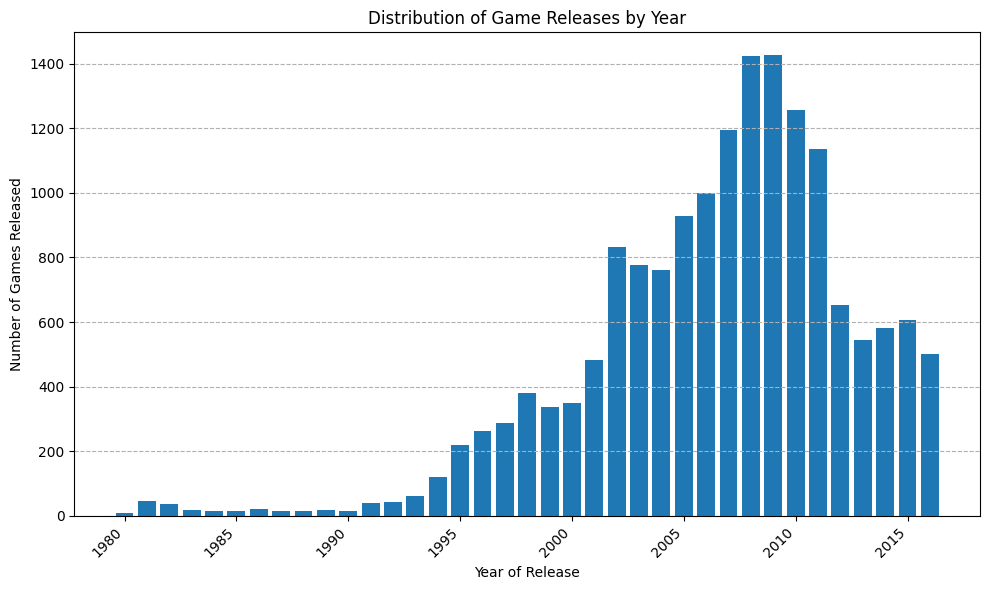

In [47]:
# Creating a pivot table with the number of games released per year
pivot_table_release = data_gr.loc[data_gr['year_of_release'] > 0].pivot_table(index='year_of_release', 
                                                                              values='name', 
                                                                              aggfunc='count')
pivot_table_release = pivot_table_release.reset_index()
pivot_table_release.columns = ['year_of_release', 'quantity']

# Creating a plot of the distribution of game releases by year
plt.figure(figsize=(10, 6))
plt.bar(pivot_table_release['year_of_release'], pivot_table_release['quantity'])
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.title('Distribution of Game Releases by Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

From the graph, we can see that the gaming industry experienced its first sharp increase in the number of games produced around 1995. Around 2002, the number nearly doubled, reaching its peak in 2008-2009. After that, there was a sharp decline in 2012, and the period from 2012 to 2016 can be characterized as a plateau.

### Distribution of Sales Volumes on Different Platforms by Year

Now let's look at how the total sales volume changed over the years depending on the platform on which the game was released.

In [48]:
# Creating a pivot table of sales volumes by year depending on the platform
platform_sales = data_gr.pivot_table(values='total_sales', 
                                     index='platform', 
                                     columns='year_of_release', 
                                     aggfunc='sum', 
                                     fill_value=0)

# Grouping the data by total sales for each platform
total_sales_by_platform = data_gr.groupby('platform')['total_sales'].sum().sort_values(ascending=True).to_frame()
total_sales_by_platform

,total_sales
platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42
NG,1.44
SCD,1.86
DC,15.95
GEN,28.35


In [49]:
# Sorting platforms with total sales over 50 million copies
max_sale_platforms = total_sales_by_platform.loc[total_sales_by_platform['total_sales'] > 50]

# Filtering rows in the pivot table by platforms, keeping only those with sales over 50 million
filtered_platform_sales = platform_sales.loc[max_sale_platforms.index].sort_index()
filtered_platform_sales

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.27,130.14,119.81,146.95,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00
GB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,64.97,4.89,5.57,25.49,0.00,12.18,3.60,36.03,6.37,26.90,38.00,19.76,9.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.34,52.11,50.61,28.82,27.62,11.26,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
N64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34.10,39.50,49.24,57.87,33.97,3.25,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NES,0.00,0.00,0.00,10.96,50.08,53.44,36.41,19.76,45.01,7.85,15.73,6.11,1.98,3.61,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PC,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.03,0.00,0.00,0.00,3.03,0.00,12.87,4.22,10.58,11.27,3.26,4.74,4.66,5.47,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25


Visualizing the filtered data using a heatmap:

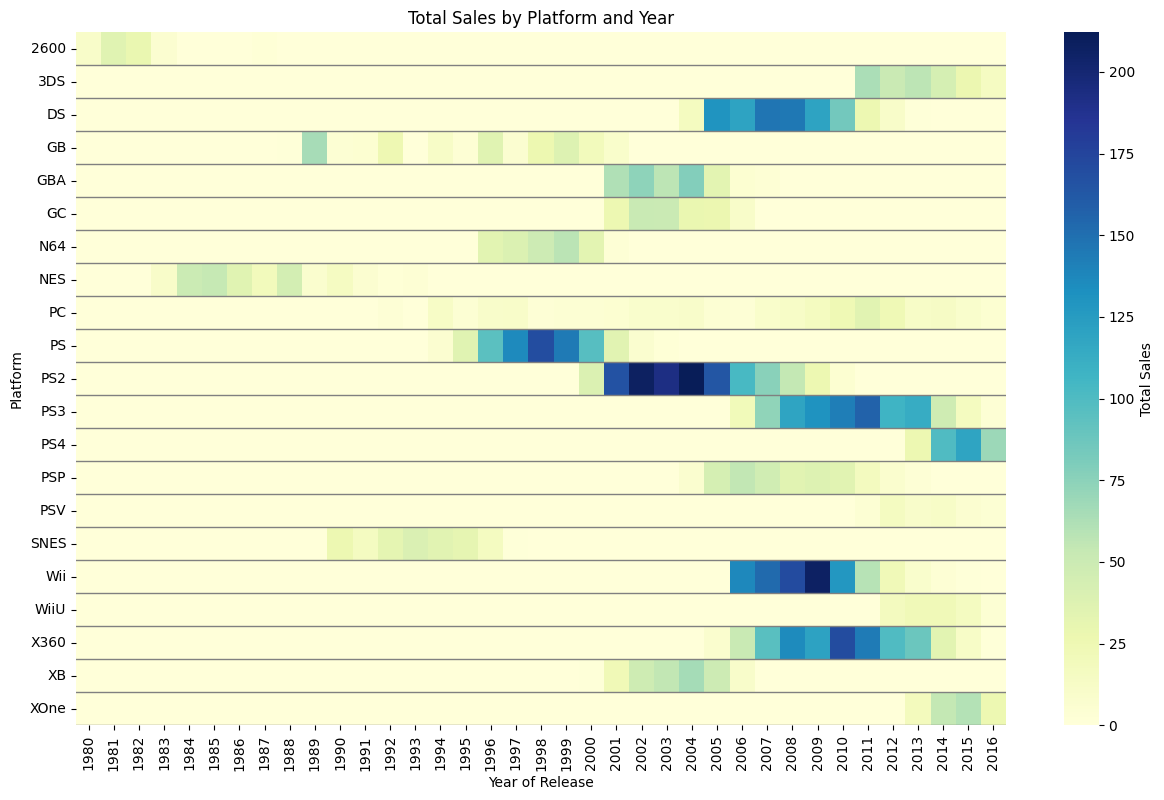

In [50]:
plt.figure(figsize=(15, 9))
seaborn.heatmap(filtered_platform_sales, 
                annot=False, 
                cmap='YlGnBu', 
                fmt='g', 
                cbar_kws={'label': 'Total Sales'})
plt.title('Total Sales by Platform and Year')
plt.xlabel('Year of Release')
plt.ylabel('Platform')
for i in range(len(filtered_platform_sales)):
    plt.axhline(i + 1, color='grey', linewidth=1)
plt.show()

From the analysis of the diagram above, it is evident how popular platforms are gradually replaced by others. For example, in the 80s and 90s, the Nintendo platform was very popular: during the first decade, its first version, NES, had the greatest popularity, which was then replaced by SNES in the second decade. The graph also shows later versions of Nintendo: DS and 3DS.

The generational shift of gaming platforms is most clearly seen with PS: approximately every 5-6 years, a new generation of the console is released, which gains greater popularity (PS, PS2, PS3, PS4), while the company also releases alternative platforms (PSP, PSV), which, however, did not achieve the same popularity as the updated version of the main console.

Thus, the average generational cycle of popular platforms change is about 5-6 years.

The most popular platforms in recent times are: PS (PS, PS2, PS3, PS4, PSP, PSV), Xbox (XB, X360, XOne), DS (DS, 3DS), Wii (Wii, WiiU). At the same time, for 20 years, games for stationary personal computers (PC) have maintained a stable position. While they have not been the leaders in sales volume, they have never completely lost their relevance, unlike games for certain console models.

### Selecting the Relevant Period for Analysis

Overall, based on the analysis of the two graphs, it can be concluded that the relevant period for further analysis spans from 2012 to 2016. Firstly, during this time, there is a transition to the latest generation for major platforms like XB, PS, DS, and Wii. Secondly, this period stands out for its sales volumes, showing a steady plateau after a sharp decline.

In [51]:
# Filtering the dataframe to include only games released from 2012 onwards
data_gr_2012 = data_gr.loc[data_gr['year_of_release'] >= 2012]

### Visualization of Platform Popularity Using a Box Plot

Now let's create a box plot with a breakdown by platforms, limiting the number of displayed outliers - extremely popular games with colossal sales volumes:

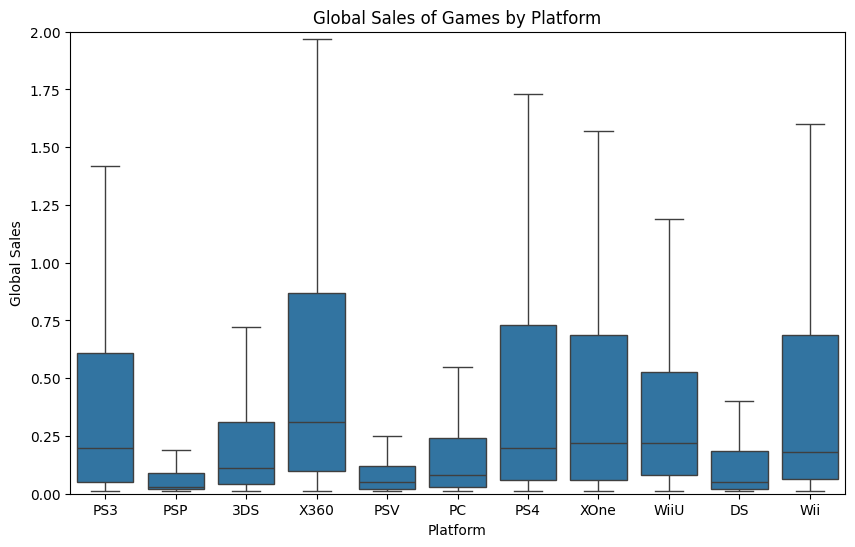

In [52]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(x='platform', y='total_sales', data=data_gr_2012, showfliers=False)
plt.ylim(0, 2)
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.show()

Based on the analysis of the diagram, we can conclude that there are three clearly leading platforms in the market: Xbox with its latest models X360 (market leader) and XOne, PlayStation (PS) with its two latest models PS4 and PS3, and WiiU (including Wii). The latest PS model has already surpassed its predecessor in sales, while Xbox and Wii are still gaining popularity with their latest models.

### The Impact of Critic and User Scores on Sales

Let's check the correlation between critic and user reviews and sales volumes. We'll take the X360 platform, which leads the market in terms of sales volume, and compare the correlation between reviews and sales for it and all platforms during the relevant period.

#### Critic Scores

Filtering the data by removing zero values in the critic scores column, then plotting a combined scatter plot for platform X360 and all platforms:

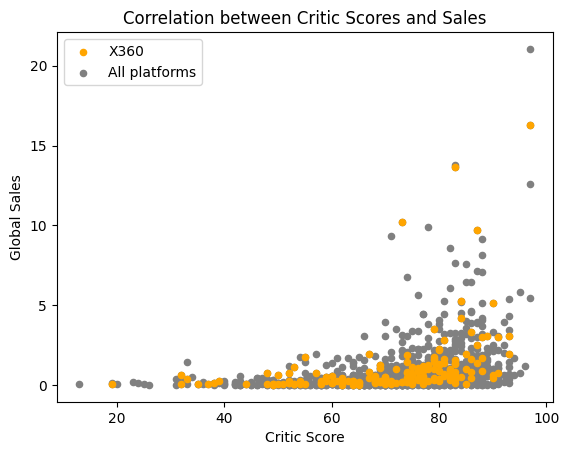


Correlation coefficient for X360: 0.3606
Correlation coefficient for all platforms: 0.3086


In [53]:
# Scatter plot for X360
filtered_data = data_gr_2012[(data_gr_2012['critic_score'] != 0) & (data_gr_2012['platform'] == 'X360')]
ax = filtered_data.plot(x='critic_score', 
                        y='total_sales', 
                        kind='scatter', 
                        c='orange', 
                        label='X360', 
                        zorder=2)

# Scatter plot for all platforms
filtered_data2 = data_gr_2012[data_gr_2012['critic_score'] != 0]
bx = filtered_data2.plot(ax=ax, 
                         x='critic_score', 
                         y='total_sales', 
                         kind='scatter', 
                         c='grey', 
                         label='All platforms', 
                         zorder=1)

bx.set_xlabel('Critic Score')
bx.set_ylabel('Global Sales')
bx.set_title('Correlation between Critic Scores and Sales')

ax.legend()
plt.show()

# Displaying correlation coefficients
print()
print('Correlation coefficient for X360:', 
      filtered_data['critic_score'].corr(filtered_data['total_sales']).round(4))
print('Correlation coefficient for all platforms:', 
      filtered_data2['critic_score'].corr(filtered_data2['total_sales']).round(4))


It seems like the correlation between critic scores and sales is generally weak, both for individual platforms like X360 and for all platforms combined. The correlation coefficients are quite low, not exceeding 0.36, and the scatter plot shows almost a flat horizontal line. There's a very weak positive correlation noted only within the range of critic scores from 60 to 85 points.

#### User Scores

Similarly to the critic scores, let's plot scatter diagrams for the relationship between user scores and sales for X360 and all platforms (excluding zero user score values).

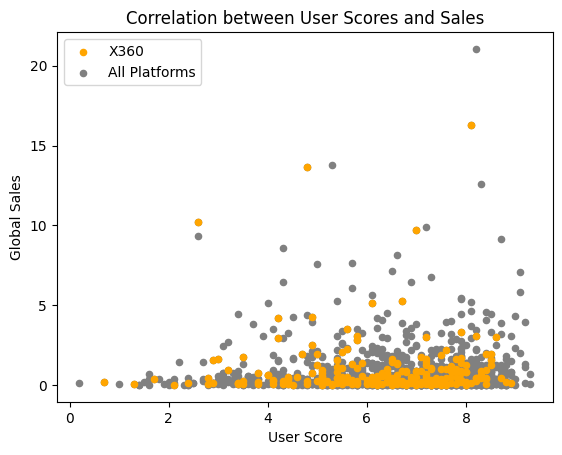


Correlation coefficient for X360: 0.0062
Correlation coefficient for all platforms: 0.0042


In [54]:
# Scatter plot for X360
filtered_data = data_gr_2012[(data_gr_2012['user_score'] != 0) & (data_gr_2012['platform'] == 'X360')]
ax = filtered_data.plot(x='user_score', 
                        y='total_sales', 
                        kind='scatter', 
                        c='orange', 
                        label='X360', 
                        zorder=2)

# Scatter plot for all platforms
filtered_data2 = data_gr_2012[data_gr_2012['user_score'] != 0]
bx = filtered_data2.plot(ax=ax, 
                         x='user_score', 
                         y='total_sales', 
                         kind='scatter', 
                         c='grey', 
                         label='All Platforms', 
                         zorder=1)
bx.set_xlabel('User Score')
bx.set_ylabel('Global Sales')
bx.set_title('Correlation between User Scores and Sales')

ax.legend()
plt.show()    

# Displaying correlation coefficients
print()
print('Correlation coefficient for X360:', 
      filtered_data['user_score'].corr(filtered_data['total_sales']).round(4))
print('Correlation coefficient for all platforms:', 
      filtered_data2['user_score'].corr(filtered_data2['total_sales']).round(4))


It seems like there is almost no correlation between user scores and sales for both platforms.

Overall, it can be said that there is almost no direct correlation between sales volume of games on different platforms and ratings from both critics and users.

### Sales Level and Game Genres

Let's examine the overall distribution of games by genre. To do this, we will construct a pivot table showing the distribution of global sales by genre, and then visualize the obtained information:

           genre  total_sales_sum  total_sales_count  average_sales
0         Action           441.12               1031       0.427856
1        Shooter           304.73                235       1.296723
2   Role-Playing           192.80                370       0.521081
3         Sports           181.07                267       0.678165
4           Misc            85.04                192       0.442917
5       Platform            61.00                 85       0.717647
6         Racing            53.50                115       0.465217
7       Fighting            44.49                109       0.408165
8     Simulation            35.12                 80       0.439000
9      Adventure            29.43                302       0.097450
10      Strategy            13.34                 71       0.187887
11        Puzzle             4.89                 28       0.174643


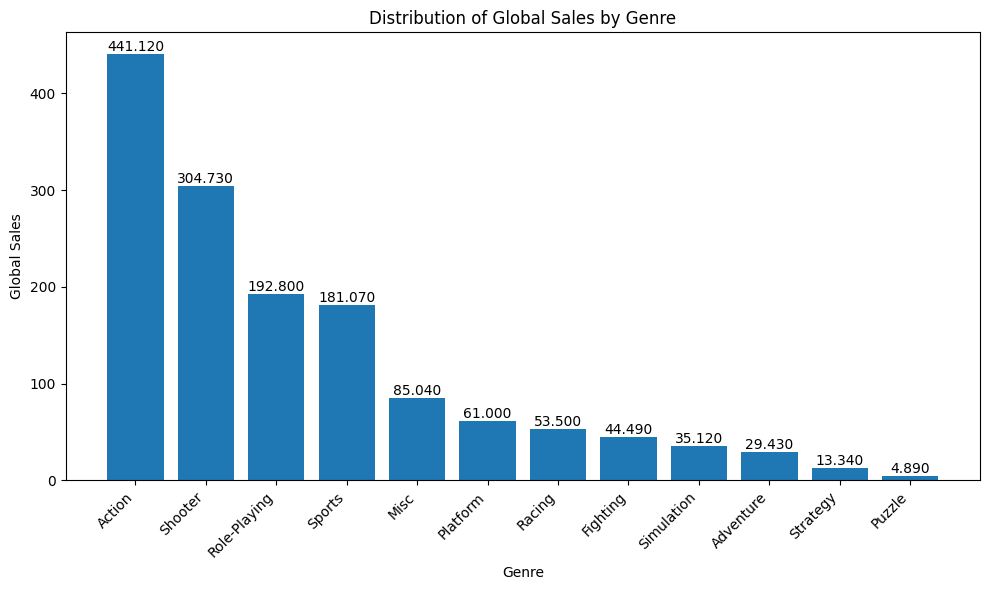

In [55]:
# Building a pivot table with sum and count of game sales by genre
pivot_table_genre = data_gr_2012.pivot_table(index='genre', 
                                             values='total_sales', 
                                             aggfunc=['sum', 'count'])

# Sorting by total sales sum in descending order and reset index
pivot_table_genre = pivot_table_genre.sort_values(by=('sum', 'total_sales'), ascending=False).reset_index()
pivot_table_genre.columns = ['genre', 'total_sales_sum', 'total_sales_count']

# Calculating average sales per genre
pivot_table_genre['average_sales'] = pivot_table_genre['total_sales_sum'] / pivot_table_genre['total_sales_count']

# Displaying the pivot table
print(pivot_table_genre)

# Plotting a bar chart for global sales by genre
plt.figure(figsize=(10, 6))
bars = plt.bar(pivot_table_genre['genre'], pivot_table_genre['total_sales_sum'])
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.title('Distribution of Global Sales by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Displaying values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, 
             height, 
             f'{height:.3f}', 
             ha='center', 
             va='bottom')
    
plt.show()

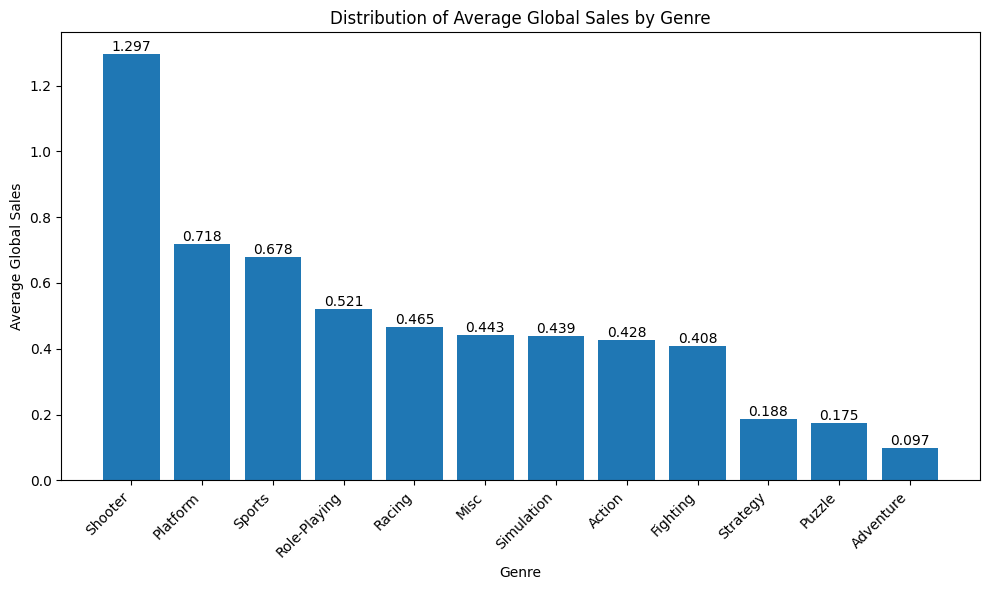

In [56]:
# Resorting the pivot table by the 'average_sales' column value
pivot_table_genre = pivot_table_genre.sort_values(by='average_sales', ascending=False)

# Plotting a bar chart for average global sales by genre
plt.figure(figsize=(10, 6))
bars = plt.bar(pivot_table_genre['genre'], pivot_table_genre['average_sales'])
plt.xlabel('Genre')
plt.ylabel('Average Global Sales')
plt.title('Distribution of Average Global Sales by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Displaying values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, 
             height, 
             f'{height:.3f}', 
             ha='center', 
             va='bottom')
    
plt.show()

In terms of aggregated data, the clear leader in profitability among genres is Action. Shooter and Role-Playing genres also demonstrate high profitability. Conversely, genres with the lowest sales figures are Puzzle, Strategy, and Adventure.

However, it's important to note that the higher sales figures for Action games are partly due to the sheer number of games in this genre. When considering average sales figures, the top genres are Shooter, Platform, and Sports (with Adventure, Strategy, and Puzzle still at the bottom, albeit in a different order).

**Conclusion:** Overall, the graph depicting the release of games over the years shows sharp growth in game production in 1995 and 2002, a peak in 2008-2009, followed by a decline in 2012. The period from 2012 to 2016 can be characterized as a plateau.

Over the past decade, new generations of platforms have entered the market approximately every 5-6 years. The only platform showing consistently average results over many years is the personal computer (PC).

Simultaneously, the most popular and promising platforms are PS (PS, PS2, PS3, PS4, PSP, PSV), XBox (XB, X360, XOne), slightly less popular but also promising are Wii (Wii, WiiU), and DS (DS, 3DS).

For detailed analysis, the period from 2012 to 2016 was chosen.

Both critic and user ratings have almost no impact on sales. However, game genre significantly influences sales. The most popular genres in terms of average sales per game are Shooter, Platform, and Sports. According to aggregated data, considering the number of games released, the most popular genres are Action, Shooter, and Role-Playing. The least popular genres across all types of calculations are Strategy, Puzzle, and Adventure.

## Creating a User Profile for Each Region

### Platforms

To begin with, let's determine the top 5 most popular platforms for each sales region (NA, EU, JP):

Total sales volume in NA region: 590.97
Top 5 platforms in NA region:
platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

Total sales volume in EU region: 506.82
Top 5 platforms in EU region:
platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

Total sales volume in JP region: 192.58
Top 5 platforms in JP region:
platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64



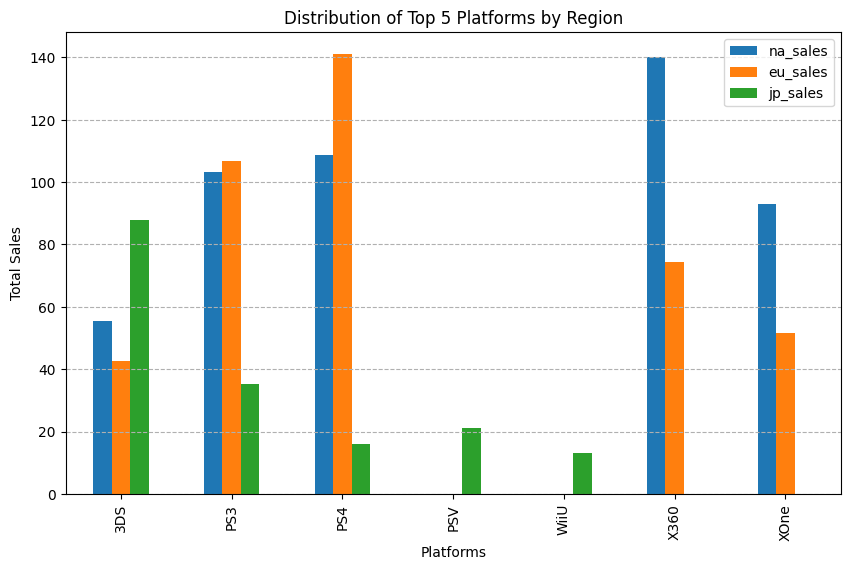

In [57]:
# Constructing a pivot table with sales volumes by platform and region
pivot_table_platform = data_gr_2012.pivot_table(index=['platform'], 
                                                values=['na_sales', 'eu_sales', 'jp_sales'], 
                                                aggfunc='sum')

# Displaying total sales and top platforms for each region
regions = ['na_sales', 'eu_sales', 'jp_sales']
region_names = ['NA', 'EU', 'JP']

for region, name in zip(regions, region_names):
    total_sales = pivot_table_platform[region].sum().round(2)
    top_platforms = pivot_table_platform[region].sort_values(ascending=False).head(5)
    print(f'Total sales volume in {name} region: {total_sales}')
    print(f'Top 5 platforms in {name} region:')
    print(top_platforms)
    print()

# Creating a consolidated table with top 5 platforms for each region
na_sales = pivot_table_platform['na_sales'].sort_values(ascending=False).head(5).to_frame()
eu_sales = pivot_table_platform['eu_sales'].sort_values(ascending=False).head(5).to_frame()
jp_sales = pivot_table_platform['jp_sales'].sort_values(ascending=False).head(5).to_frame()
result_sales = pd.merge(na_sales, eu_sales, left_index=True, right_index=True, how='outer')
result_sales = pd.merge(result_sales, jp_sales, left_index=True, right_index=True, how='outer')
result_sales.columns = ['na_sales', 'eu_sales', 'jp_sales']

# Plotting a grouped bar chart
cx = result_sales.plot(kind='bar', stacked=False, figsize=(10, 6))
cx.set_ylabel('Total Sales')
cx.set_xlabel('Platforms')
cx.set_title('Distribution of Top 5 Platforms by Region')
cx.grid(axis='y', linestyle='--')

plt.show()

The North American market is the largest among the three regional markets, with the platform X360 leading by a significant margin, closely followed by PS4 and PS3 in terms of sales. The least popular but still in the top 5 platforms is 3DS.

The European market constitutes about 85% of the North American market. The list of the top 5 platforms is similar here, but the ranking order differs. PS4 is the most popular platform, while X360 occupies the 3rd position.

The Japanese market is only 33% of the size of the North American market and is notably distinct in its preferences. The platform 3DS (produced by Nintendo in Japan) leads in sales here, whereas it ranks last in the top 5 on other markets. Popular platforms in Japan also include PS3, PSV, and PS4, with WiiU, developed by Nintendo, also in the top rankings. X360 is not represented in the Japanese market at all.

### Genres

Now, let's determine the top 5 most popular genres for each of the sales regions (NA, EU, JP):

Total sales volume in NA region: 590.97
Top 5 genres in NA region:
genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

Total sales volume in EU region: 506.82
Top 5 genres in EU region:
genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

Total sales volume in JP region: 192.58
Top 5 genres in JP region:
genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64



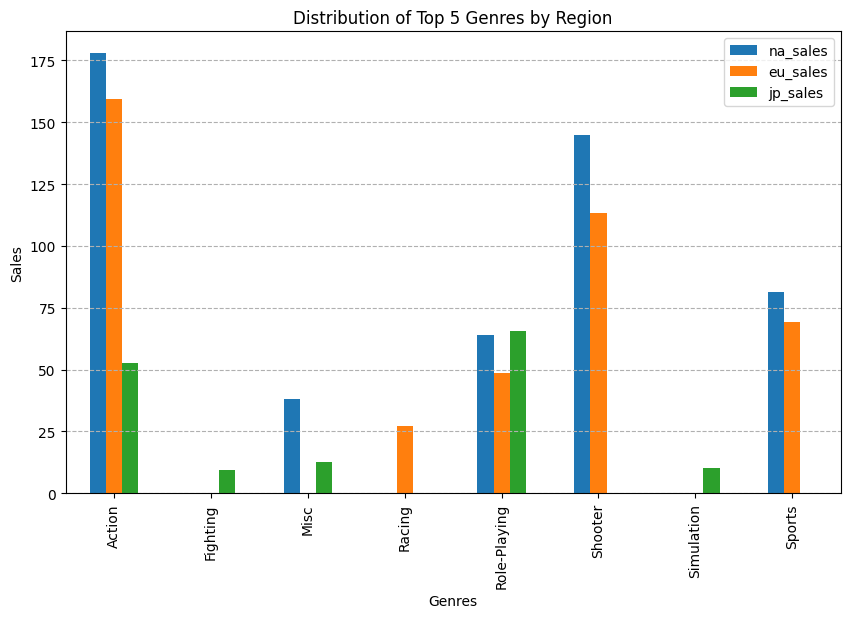

In [58]:
# Constructing a pivot table with sales volumes by genre and region
pivot_table_genre = data_gr_2012.pivot_table(index=['genre'], 
                                             values=['na_sales', 'eu_sales', 'jp_sales'], 
                                             aggfunc='sum')

# Displaying total sales volume and top genres for three regions
regions = ['na_sales', 'eu_sales', 'jp_sales']
region_names = ['NA', 'EU', 'JP']

for region, name in zip(regions, region_names):
    total_sales = pivot_table_genre[region].sum().round(2)
    top_genres = pivot_table_genre[region].sort_values(ascending=False).head(5)
    print(f'Total sales volume in {name} region: {total_sales}')
    print(f'Top 5 genres in {name} region:')
    print(top_genres)
    print()

# Creating a consolidated table with top 5 genres for each region
na_sales_g = pivot_table_genre['na_sales'].sort_values(ascending=False).head(5).to_frame()
eu_sales_g = pivot_table_genre['eu_sales'].sort_values(ascending=False).head(5).to_frame()
jp_sales_g = pivot_table_genre['jp_sales'].sort_values(ascending=False).head(5).to_frame()
result_sales_g = pd.merge(na_sales_g, eu_sales_g, left_index=True, right_index=True, how='outer')
result_sales_g = pd.merge(result_sales_g, jp_sales_g, left_index=True, right_index=True, how='outer')
result_sales_g.columns = ['na_sales', 'eu_sales', 'jp_sales']

# Creating a grouped bar chart
dx = result_sales_g.plot(kind='bar', stacked=False, figsize=(10, 6))
dx.set_ylabel('Sales')
dx.set_xlabel('Genres')
dx.set_title('Distribution of Top 5 Genres by Region')
dx.grid(axis='y', linestyle='--')

plt.show()

The total sales volume for each region remains unchanged; however, the distribution of genres shows regional specificities.

In the North American region, the most popular genres are Action, Shooter, and Sports, with the first two corresponding to global market trends. Role-Playing games occupy the fourth position.

On the European market, the top three genres are the same, but instead of Misc, which is popular in North America, Racing appears in fifth place, a genre less popular in other markets.

In the Japanese market, Role-Playing games dominate, alongside genres like Action and Misc, which are common in other markets. Additionally, Simulation and Fighting genres also make an appearance.

### Rating

Finally, let's determine if the `ESRB (Entertainment Software Rating Board)` rating, which defines the age rating of computer games for users, influences sales in the NA region.

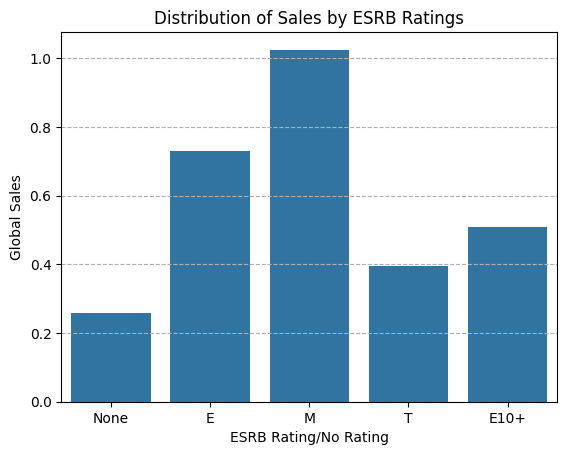

In [68]:
seaborn.barplot(x=data_gr_2012['rating'], y=data_gr_2012['total_sales'], errorbar=None)
plt.title('Distribution of Sales by ESRB Ratings')
plt.xlabel('ESRB Rating/No Rating')
plt.ylabel('Global Sales')
plt.grid(axis='y', linestyle='--')
plt.show()

Based on the graph, a clear affirmative answer can be given regarding the influence of game ratings on sales levels in the North American region. Leading in this market are games rated as M (17+), while the least popular are games rated as T (13+).

It is worth noting that games without a specified rating, which are predominantly produced in Europe and Japan, accounting for nearly 45% of the total volume of produced games, have relatively low sales.

**Conclusion:** Based on the research into regional market characteristics, it can be concluded that trends observed in the North American market, being the largest of the three, simultaneously reflect and set global trends. The European market also aligns with global trends while maintaining its own distinct features. In contrast, the Japanese market exhibits pronounced regional specificity in terms of platform and genre preferences.

Game ratings decisively impact sales in the NA region. However, games produced in Europe and Japan, despite comprising approximately 45% of total production volume, achieve significantly lower sales figures compared to these proportions.

## Hypotheses Testing

### Hypothesis 1: The average user scores for Xbox One and PC platforms are the same.

First, let's disaply the average user score for games on the Xbox One platform (XOne):

In [60]:
average_user_rating_XOne = data_gr_2012.loc[(data_gr_2012['platform'] == 'XOne') & \
                           (data_gr_2012['user_score'] != 0), 'user_score'].mean()
average_user_rating_XOne.round(2)

6.52

Now let's display similar information for games released on personal computers (PC):

In [61]:
average_user_rating_PC = data_gr_2012.loc[(data_gr_2012['platform'] == 'PC') & \
                        (data_gr_2012['user_score'] != 0), 'user_score'].mean()
average_user_rating_PC.round(2)

6.43

**Null Hypothesis:** The mean user scores of games on the Xbox One and PC platforms are equal.

**Alternative Hypothesis:** The mean user scores of games on the Xbox One and PC platforms are not equal.

We will use a significance level of 0.05 (5%), which is commonly used in scientific research. We will test this hypothesis using the scipy.stats.ttest_ind method with samples taken from the populations.

In [62]:
sample_1 = data_gr_2012.loc[(data_gr_2012['platform'] == 'XOne') & (data_gr_2012['user_score'] != 0), 'user_score']
sample_2 = data_gr_2012.loc[(data_gr_2012['platform'] == 'PC') & (data_gr_2012['user_score'] != 0), 'user_score']

alpha = 0.05  # significance level

results = st.ttest_ind(sample_1, sample_2)

print()
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failing to reject the null hypothesis')


p-value: 0.5535080500643738
Failing to reject the null hypothesis


It seems like the scipy.stats.ttest_ind method did not provide enough evidence to reject the null hypothesis that the mean user scores for Xbox One and PC platforms are equal.

### Hypothesis 2: The mean user scores for the Action genre and the Sports genre are different.

First, let's display the average user ratings for games in the Action genre:

In [63]:
average_user_rating_Action = data_gr_2012.loc[(data_gr_2012['genre'] == 'Action') & \
                             (data_gr_2012['user_score'] != 0), 'user_score'].mean()
average_user_rating_Action.round(2)

6.83

Now let's display similar information for games in the Sports genre:

In [64]:
average_user_rating_Sports = data_gr_2012.loc[(data_gr_2012['genre'] == 'Sports') & \
                             (data_gr_2012['user_score'] != 0), 'user_score'].mean()
average_user_rating_Sports.round(2)

5.46

Here we will also conduct an additional test to verify the equality of means between two populations using samples taken from them, employing the scipy.stats.ttest_ind method.

**Null hypothesis:** The average user scores of games in the Action and Sports genres are equal.

**Alternative hypothesis:** The average user scores of games in the Action and Sports genres are not equal.

We will use a significance level of 0.05, which is widely accepted in scientific research.

In [65]:
sample_1 = data_gr_2012.loc[(data_gr_2012['genre'] == 'Action') & (data_gr_2012['user_score'] != 0), 'user_score']
sample_2 = data_gr_2012.loc[(data_gr_2012['genre'] == 'Sports') & (data_gr_2012['user_score'] != 0), 'user_score']

alpha = 0.05  # significance level

results = st.ttest_ind(sample_1, sample_2)

print()
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failing to reject the null hypothesis') 


p-value: 4.804523380462848e-26
Rejecting the null hypothesis


This time, the scipy.stats.ttest_ind method confirmed that the null hypothesis of equal average user scores for Xbox One and PC platforms can be rejected, which is consistent with the calculation of mean values.

**Conclusion:** The average user ratings for Xbox One and PC platforms are comparable, while the average user ratings for games in the Action and Sports genres cannot be equated.

## Analysis Results

The original dataset contained missing values and inconsistencies in data types across columns. During the data preprocessing stage:

- Column names were converted to lowercase.
- Implicit duplicates (differing only in sales volume) were aggregated.
- Data types were adjusted to `str` for `name`, `platform`, and `genre`, `int` for `year_of_release`, `critic_score`, and `float` for `user_score`.
- Missing values were filled with zeros in `critic_score`, `user_score`, and partially restored from game titles in `year_of_release`, while `None` was used for `rating`.

A graph showing the distribution of game releases by year revealed sharp increases in 1995 and 2002, peaking in 2008-2009, and leveling off from 2012 to 2016. Based on this, a stable development of the gaming industry can be forecasted for a few following years.

Over the last decade, new generations of platforms have entered the market every 5-6 years. The only platform showing consistent performance over many years is the personal computer (PC).

Simultaneously, the most popular and promising platforms are PS (PS3, PS4), Xbox (X360, XOne), slightly less popular but also promising are DS (3DS), and Wii (WiiU).

For detailed analysis, the period from 2012 to 2016 was selected.

The analysis revealed that sales are minimally affected by both critic and user ratings. However, game genre significantly influences sales. The most popular genres based on the average sales per game are Shooter, Platform, and Sports. In terms of aggregate data accounting for the number of releases, the most popular genres are Action, Shooter, and Role-Playing. The least popular genres under any calculation method are Strategy, Puzzle, and Adventure.

The trend in genre popularity appears similar in the North American and European regions, whereas in Japan, Role-Playing takes the lead, with Platform also making it into the top 5.

The North American region leads in sales volume, surpassing the combined totals of other regions. In North America and Europe, the most popular platforms are Xbox (X360) and PlayStation (PS3, PS4). In Japan, the locally produced Nintendo platform (3DS) takes the lead.

In the North American region, games with an M rating are the most popular, while those with a T rating are the least popular. The same graph showed significantly lower sales volumes for games produced in Japan and Europe.

The average user ratings for Xbox One and PC platforms are comparable, whereas the average user ratings for games in the Action and Sports genres cannot be equated.

Thus, in planning campaigns for the coming years, it is advisable to focus on the latest models of the most popular platforms – Xbox One, PS4, 3DS, WiiU. Marketing campaigns should not prioritize improving critic and user scores, but should certainly take into account regional market characteristics: different genres and platforms are popular in different markets.